<a href="https://colab.research.google.com/github/Nikita-devel/DS_Hw3/blob/main/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset_url = "https://drive.usercontent.google.com/download?id=1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo&export=download&authuser=0"
df = pd.read_csv(dataset_url)

In [5]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
177,5243000,6050,3,1,1,yes,no,yes,no,no,0,yes,semi-furnished
63,7035000,6360,4,2,3,yes,no,no,no,yes,2,yes,furnished
57,7245000,9000,4,2,4,yes,yes,no,no,yes,1,yes,furnished
452,3150000,9000,3,1,2,yes,no,no,no,no,2,no,semi-furnished
333,3920000,3000,3,1,2,yes,no,no,no,no,0,no,semi-furnished


In [6]:
df[df.isna()].count()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
x_columns = ["area", "bedrooms","bathrooms"]
y_column = "price"
data_columns = [y_column] + x_columns
data_columns

['price', 'area', 'bedrooms', 'bathrooms']

In [9]:
df_view = df[data_columns]
df_view.sample()

,price,area,bedrooms,bathrooms
183,5145000,7980,3,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
def h_m(weight: np.array, x_matrix: np.array):
  assert weight.shape[0] == x_matrix.shape[1], f"Wrong length {weight.shape[0]}, {x_matrix.shape[0]}"
  return np.dot(x_matrix, weight)

In [12]:
def h(weight: tuple, x_data: pd.DataFrame):
  assert len(weight) == len(x_data)+1, "Wrong length"
  x = np.concatenate(([1],x_data)).astype("int64")
  w = np.array(weight)
  return np.dot(x,w)

In [13]:
def h_loop(weight, params):
  assert len(weight) == len(params)+1, "Wrong length"
  result = weight[0]
  for i,p in enumerate(params, start=1):
    # print(result, i, p, weight[i], weight[i]*p)
    result += weight[i]*p
  #result = weight[0] + weight[1]*params[0]
  return result

In [15]:
weight_t = np.array([2,3,4])
features_t = np.array([[1,10.0,20.0]])
assert h_m(weight_t, features_t) == 112, "Wrong H result"

In [16]:
weight_t = (2,3,4)
features_t = (10.0,20.0)
assert h(weight_t, features_t) == 112, "Wrong H result"

In [18]:
def loss_fuction_mat(weight:np.array, x_matrix:np.array, y:np.array) -> float:
  m = x_matrix.shape[0]
  predictions = h_m(weight, x_matrix)
  return np.sum(np.square(predictions - y)) / (2 * m)

In [19]:
def loss_fuction(weight, df, columns):
  m = df.shape[0]
  cost = 0
  for y, *features in zip(*[df[column] for column in columns]):
    # print(y, features)
    cost += (h(weight, features) - y)**2
  return cost/(2*m)


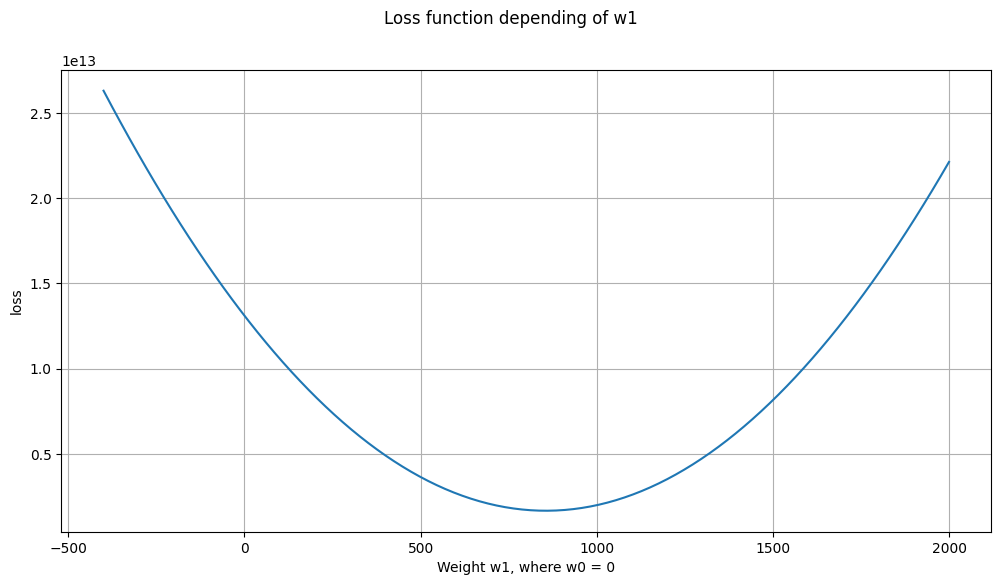

In [23]:
x = np.linspace(-400, 2000, 100)
y = [ loss_fuction( weight=(0, w), df=df_view, columns=[y_column,x_columns[0]] ) for w in x ]
fig = plt.figure(figsize=(12,6))
plt.suptitle("Loss function depending of w1")
plt.grid()
plt.plot(x,y)
plt.xlabel("Weight w1, where w0 = 0")
plt.ylabel("loss")
plt.show()

In [24]:
def grad_step_mat(weight:np.array, x_matrix, y,
                  learning_rate:float = 0.01) -> np.array:
  m = x_matrix.shape[0]
  delta = x_matrix.dot(weight) - y
  step =  np.dot(x_matrix.T, delta) / m
  return weight - step*learning_rate

# MAT GRAD DESCENT
def grad_descent_mat(weight:np.array, df:pd.DataFrame, num_iter:int,
                     x_columns:list, y_column:str,
                     learning_rate:float=0.01, epsilon:float=0.01) -> tuple[list, list]:
  features = df[x_columns].values
  y_data = df[y_column].values
  x_matrix = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1).astype("int64")
  # first iteration
  weight = grad_step_mat(weight, x_matrix, y_data,  learning_rate=learning_rate)
  loss = loss_fuction_mat(weight, x_matrix, y_data)
  history_loss = [loss]
  # next iteration
  for i in range(1, num_iter):
    weight = grad_step_mat(weight, x_matrix, y_data,  learning_rate=learning_rate)
    loss = loss_fuction_mat(weight, x_matrix, y_data)
    delta = abs(loss-history_loss[-1])
    if  delta < epsilon:
      print(f"{delta=}, {epsilon=}")
      # history_loss.append(loss)
      break
    history_loss.append(loss)
  return list(weight), history_loss

In [26]:
def grad_step(weight, grads, learning_rate=0.01):
  w = np.array(weight)
  g = np.array(grads)
  w = w - learning_rate * g
  return list(w)


def grads_w_n(weight, df, columns):
    X = df[columns].values
    y = df.iloc[:, 0].values  # Assuming the first column is the target variable
    predictions = X.dot(weight)
    errors = predictions - y
    grads = (X.T @ errors) / len(y)
    return grads.tolist()


def grad_descent(weight, df, num_iter, columns, learning_rate=0.01, epsilon=0.01):
  loss = loss_fuction(weight, df, columns)
  history_loss = [loss]
  for i in range(num_iter):
    grads = grads_w_n(weight, df, columns)
    weight = grad_step(weight, grads, learning_rate=learning_rate)
    loss = loss_fuction(weight, df, columns)
    delta = abs(loss-history_loss[-1])
    if  delta < epsilon:
      print(f"{delta=}, {epsilon=}")
      history_loss.append(loss)
      break
    history_loss.append(loss)
  return weight, history_loss

In [27]:
max_epochs = 200
learning_rate = 0.00000001
epsilon = 1e-5

weights = np.zeros(len(x_columns) + 1)

try:
    weights, history_loss = grad_descent_mat(weights, df_view, max_epochs, x_columns, y_column,
                                             learning_rate, epsilon)
    print(f"Final Weights: {weights}")
    print(f"Number of Iterations: {len(history_loss)}")
except Exception as err:
    print("********* ERROR:", err)


Final Weights: [0.8598483198127767, 855.7078948127887, 3.150747219754996, 1.7217446197272799]
Number of Iterations: 200


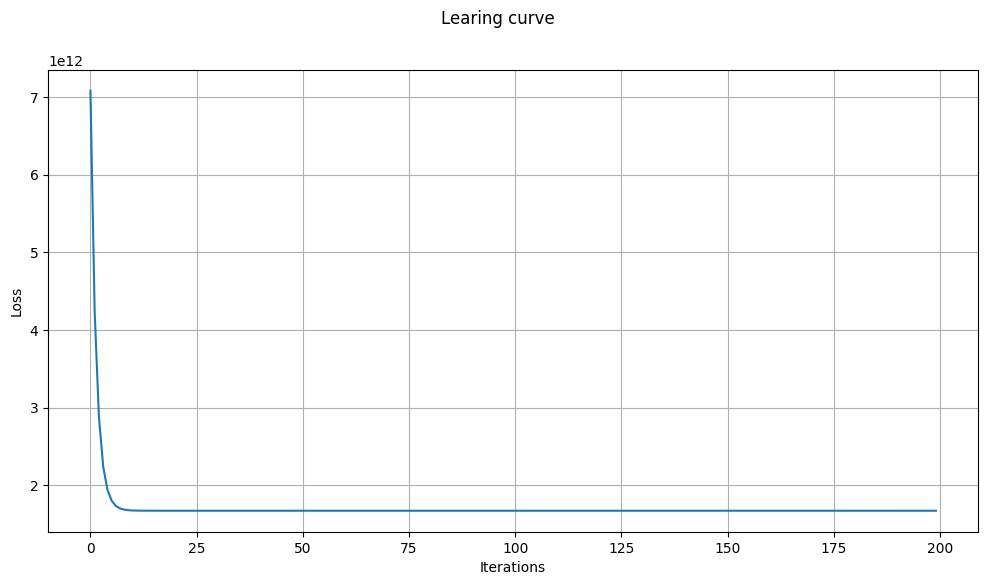

In [28]:
plt.figure(figsize=(12,6))
plt.suptitle("Learing curve")
plt.plot(history_loss)
plt.grid()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

In [31]:
# Create a Markdown cell with your expressions
from IPython.display import display, Markdown

rows_x = " \\ ".join([ str(p) for p in x_columns ])
rows_w = " \\ ".join([ f"{p:.6f}" for p in weights ])
table_content = f"""
$ \vec{{x}} = \begin{{pmatrix}} 1 \\ {rows_x} \end{{pmatrix}}
 \vec{{w}} = \begin{{pmatrix}} {rows_w}  \end{{pmatrix}}$
"""

display(Markdown(table_content))


$ ec{x} = egin{pmatrix} 1 \ area \ bedrooms \ bathrooms \end{pmatrix}
 ec{w} = egin{pmatrix} 0.859848 \ 855.707895 \ 3.150747 \ 1.721745  \end{pmatrix}$


In [32]:
features = df[x_columns].values
y_data = df[y_column].values
x_matrix = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1).astype("int64")

weigth_analytic = np.linalg.inv(x_matrix.T @ x_matrix) @ x_matrix.T @ y_data

print("Аналітичне рішення coefficients:", weigth_analytic[1:])
print("Аналітичне рішення intercept:", weigth_analytic[0])

Аналітичне рішення coefficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Аналітичне рішення intercept: -173171.6076326356


In [33]:
from IPython.display import display, Markdown

rows_x = " \\ ".join([ str(p) for p in x_columns ])
rows_w = " \\ ".join([ f"{p:.6f}" for p in weigth_analytic ])
table_content = f"""
$ \vec{{x}} = \begin{{pmatrix}} 1 \\ {rows_x} \end{{pmatrix}}
 \vec{{w}} = \begin{{pmatrix}} {rows_w}  \end{{pmatrix}}$
"""

display(Markdown(table_content))


$ ec{x} = egin{pmatrix} 1 \ area \ bedrooms \ bathrooms \end{pmatrix}
 ec{w} = egin{pmatrix} -173171.607633 \ 378.762754 \ 406820.033769 \ 1386049.497791  \end{pmatrix}$


In [34]:
regressor = LinearRegression()
X = df[x_columns]
X.shape

(545, 3)

In [35]:
regressor.fit(X, df[y_column])

LinearRegression()

In [36]:
regressor.coef_

array([3.78762754e+02, 4.06820034e+05, 1.38604950e+06])

In [37]:
regressor.intercept_

-173171.6076326361

In [38]:
weigth_scikit = np.concatenate((np.array([regressor.intercept_]), regressor.coef_), axis=0)
weigth_scikit

array([-1.73171608e+05,  3.78762754e+02,  4.06820034e+05,  1.38604950e+06])

In [39]:
from IPython.display import display, Markdown

rows_x = " \\ ".join([ str(p) for p in x_columns ])
rows_w = " \\ ".join([ f"{p:.6f}" for p in weigth_scikit ])
table_content = f"""
$ \vec{{x}} = \begin{{pmatrix}} 1 \\ {rows_x} \end{{pmatrix}}
 \vec{{w}} = \begin{{pmatrix}} {rows_w}  \end{{pmatrix}}$
"""

display(Markdown(table_content))


$ ec{x} = egin{pmatrix} 1 \ area \ bedrooms \ bathrooms \end{pmatrix}
 ec{w} = egin{pmatrix} -173171.607633 \ 378.762754 \ 406820.033769 \ 1386049.497791  \end{pmatrix}$


In [40]:
df_view[x_columns].median()

area         4600.0
bedrooms        3.0
bathrooms       1.0
dtype: float64

In [42]:
print(df_view.head(1))
p = {"area": 7420, "bedrooms": 4, "bathrooms": 2 }
price = int(h(weights,(p.get("area"), p.get("bedrooms"), p.get("bathrooms"))))
print(f"source: {p=}, predict: {price=}")

      price  area  bedrooms  bathrooms
0  13300000  7420         4          2
source: p={'area': 7420, 'bedrooms': 4, 'bathrooms': 2}, predict: price=6349369


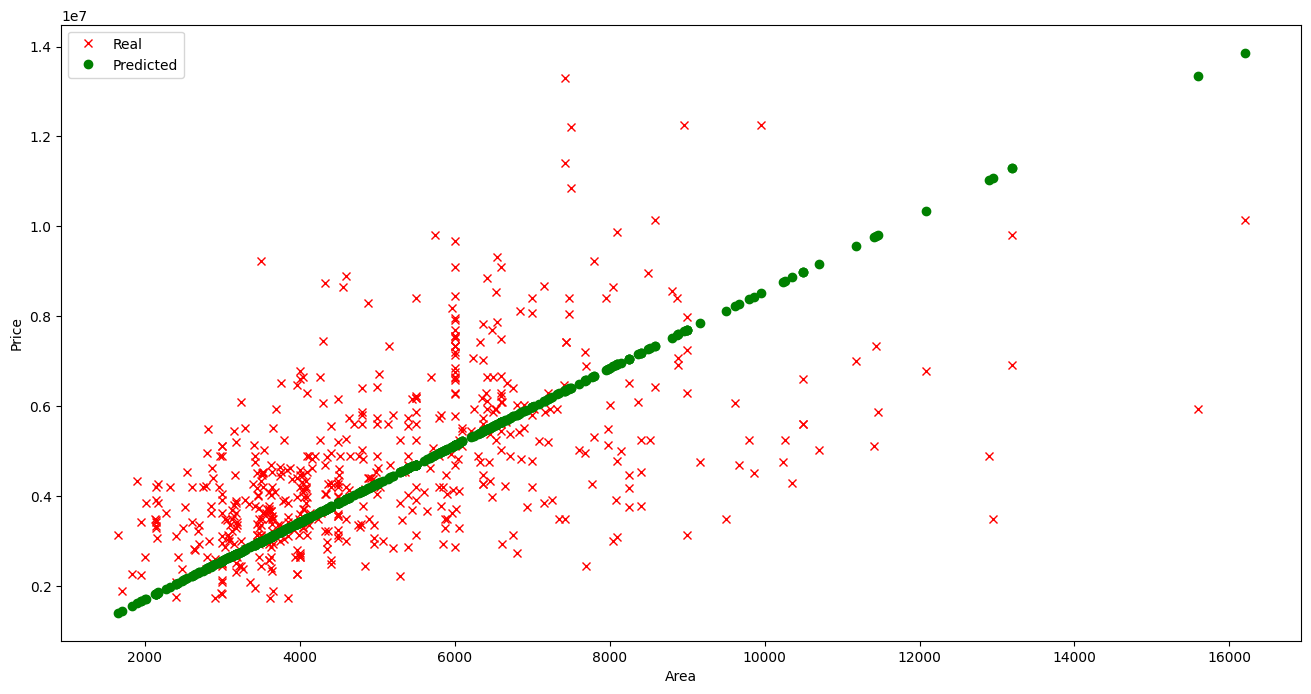

In [44]:
prediced_price = df_view[x_columns].apply(lambda x: h(weights, x) , axis=1)
plt.figure(figsize=(16,8))
data_x = df_view[data_columns[1]]
data_y = df_view[data_columns[0]]
data_p = prediced_price
plt.plot(data_x, data_y, 'rx', label = "Real")
plt.plot(data_x, data_p, 'go', label = "Predicted")
plt.legend()
plt.ylabel("Price")
plt.xlabel("Area")
plt.show()

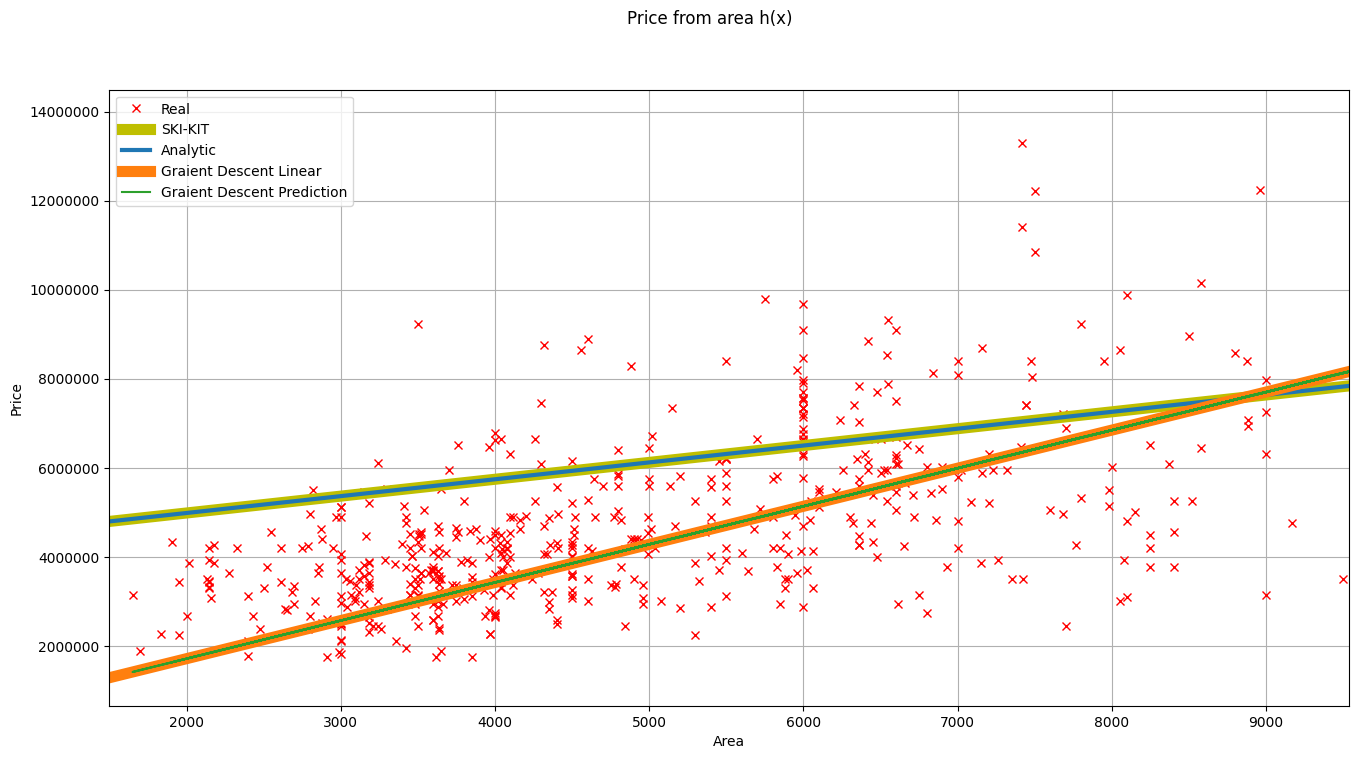

In [48]:
weight_skit_1 = [regressor.intercept_] + list(regressor.coef_)


plt.figure(figsize=(16,8))
plt.suptitle("Price from area h(x)")
plt.ticklabel_format(scilimits=(-5, 18))
data_x = df_view[data_columns[1]]
data_y = df_view[data_columns[0]]
data_x_up =  int(data_x.describe()['75%']*1.5)
x_limit = (1500, data_x_up)
plt.plot(data_x, data_y, 'rx', label = "Real")
x = np.linspace(x_limit[0],x_limit[1],5)
plt.plot(x, h_loop( weight_skit_1 , (x , 4, 2) ), "y-", linewidth=8, label="SKI-KIT")
plt.plot(x, h_loop( weigth_analytic , (x , 4, 2) ),  linewidth=3, label="Analytic")

plt.plot(x, h_loop( weights, (x , 4, 2) ),  linewidth=8, label="Graient Descent Linear")
plt.plot(data_x, prediced_price, label="Graient Descent Prediction")
plt.xlim(x_limit)
plt.grid()
plt.legend()
plt.ylabel("Price")
plt.xlabel("Area")
plt.show()

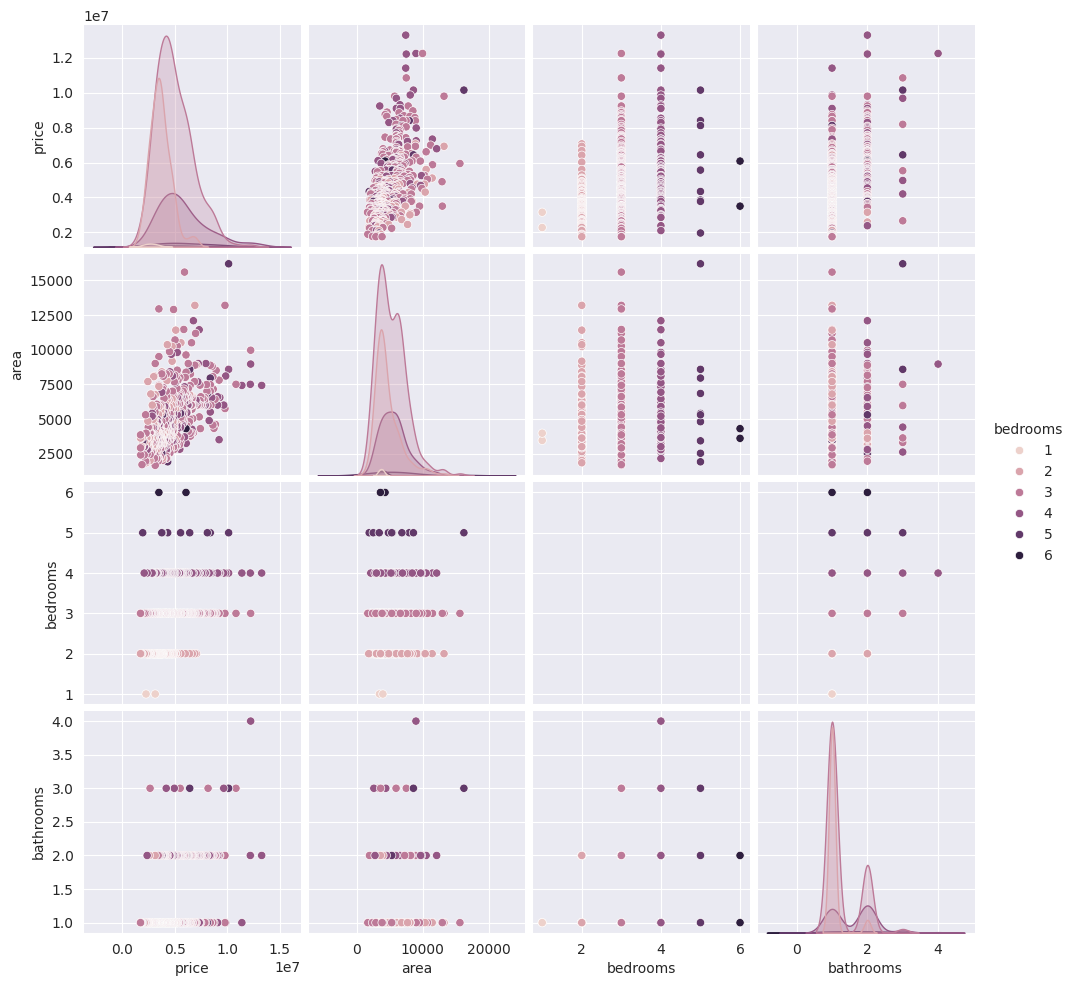

In [49]:
sns.set_style('darkgrid')
sns.pairplot(df_view, vars = data_columns, hue ='bedrooms')
plt.show()